<a href="https://colab.research.google.com/github/alexloaeza12/Simulaci-n-I/blob/main/Prueba_de_Chi_Cuadrada_a_entregar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Programa de la Prueba de Chi-Cuadrada**

---



---



La prueba de Chi-Cuadrado es un procedimiento estadístico utilizado para determinar si existe una diferencia significativa entre los resultados esperados y los observados en una o más categorías.


---



---



Nuestro programa hará una Prueba de Hipótesis, donde solicitará al usuario que ingrese un archivo Excel con una lista de datos.

#1. Formulación de la Hipótesis

In [7]:
import pandas as pd
import os
from tabulate import tabulate
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt

print("********************************")
print("* Programa del Prueba de Chi-Cuadrada *")
print("********************************\n")

H_0 = "H_o: No hay diferencia entre las proporciones del conjunto de frecuencias observadas y esperadas"
H_1 = "H_1: Hay una diferencia entre las proporciones del conjunto de diferencias observadas y esperadas"
print(H_0)
print(H_1)

********************************
* Programa del Prueba de Chi-Cuadrada *
********************************

H_o: No hay diferencia entre las proporciones del conjunto de frecuencias observadas y esperadas
H_1: Hay una diferencia entre las proporciones del conjunto de diferencias observadas y esperadas


#2. Nivel de significancia


In [8]:
Nivel_significancia=int(input("Ingrese el nivel porcentaje de aceptación:"))
Nivel_significancia=Nivel_significancia/100
alpha= round((1- Nivel_significancia),2)
print("El nivel de significancia será de",alpha)

Ingrese el nivel porcentaje de aceptación:95
El nivel de significancia será de 0.05


#3. Estadístico de prueba

Se le solicitará al usuario que cargué su archivo en Excel. Es importante que agregué el .xlsx

In [9]:
#Función para cargar el archivo de Excel y obtener los datos
def obtener_datos_desde_excel(nombre_archivo):
    try:
        #Cargamos el archivo de Excel
        df = pd.read_excel(nombre_archivo, decimal=',', header=None)  # No asumir que la primera fila es el encabezado

        #Fusionamos todas las columnas en una sola lista
        datos = df.values.flatten()

        #Mostramos los datos del archivo
        print("Datos cargados desde el archivo:")
        print(datos)

        return datos

    except Exception as e:
        print("Error al cargar el archivo:", e)
        return None

#Función para verificar si el archivo existe
def archivo_existe(nombre_archivo):
    return os.path.isfile(nombre_archivo)

#Pedimos al usuario que ingrese el nombre del archivo de Excel
nombre_archivo = input("Ingrese el nombre del archivo de Excel (incluyendo la extensión): ")

#Verificamos si el archivo existe
while not archivo_existe(nombre_archivo):
    print("El archivo ingresado no existe. Por favor, inténtelo de nuevo.")
    nombre_archivo = input("Ingrese el nombre del archivo de Excel (incluyendo la extensión): ")

#Obtenemos los datos desde el archivo de Excel
datos = obtener_datos_desde_excel(nombre_archivo)

#Mostramos los datos
if datos is not None:
    print("Los datos del archivo Excel están disponibles.")
else:
    print("No se pudieron cargar los datos del archivo Excel.")

#Pedimos al usuario que ingrese el número de clases en las que desea dividir los datos
num_clases = int(input("Ingrese el número de clases en las que desea dividir los datos: "))

#Inicializamos la lista de rangos de proporciones
rangos_proporciones = []

#Pedimos al usuario que ingrese manualmente los rangos deseados
for i in range(num_clases):
    rango_str = input(f"Ingrese el rango para la clase {i+1} (por ejemplo, 0-0.19): ")
    limites = tuple(map(float, rango_str.split('-')))
    rangos_proporciones.append(limites)

#Calculamos la cantidad de datos que se encuentran dentro de cada rango
cantidad_datos_por_rango = [sum(1 for dato in datos if rango[0] <= dato <= rango[1]) for rango in rangos_proporciones]

#Calculamos la frecuencia esperada para cada rango
frecuencia_esperada_por_rango = [len(datos) / num_clases] * num_clases

#Calculamos las diferencias entre la frecuencia observada y la frecuencia esperada
diferencias = [f_o - f_e for f_o, f_e in zip(cantidad_datos_por_rango, frecuencia_esperada_por_rango)]

#Calculamos el cuadrado de las diferencias
cuadrados_diferencias = [dif ** 2 for dif in diferencias]

#Calculamos la razón de los cuadrados de las diferencias dividida por la frecuencia esperada
razones = [cuad_dif / f_e for cuad_dif, f_e in zip(cuadrados_diferencias, frecuencia_esperada_por_rango)]

#Creamos una lista de tuplas para los resultados
resultados = [
    (f"{rango[0]:.2f} - {rango[1]:.2f}", f_o, f_e, dif, cuad_dif, razon)
    for rango, f_o, f_e, dif, cuad_dif, razon
    in zip(rangos_proporciones, cantidad_datos_por_rango, frecuencia_esperada_por_rango, diferencias, cuadrados_diferencias, razones)
]

Ingrese el nombre del archivo de Excel (incluyendo la extensión): Datos.xlsx
Datos cargados desde el archivo:
[0.8797 0.3884 0.6289 0.875  0.5999 0.8589 0.9996 0.2415 0.3808 0.9606
 0.9848 0.3469 0.7977 0.5844 0.8147 0.6431 0.7387 0.5613 0.0318 0.7401
 0.4557 0.1592 0.8536 0.8846 0.341  0.1492 0.8681 0.5291 0.3188 0.5992
 0.917  0.2204 0.5991 0.5461 0.5739 0.3254 0.0856 0.2258 0.4603 0.5027
 0.8376 0.6235 0.3681 0.2088 0.1525 0.2006 0.472  0.4272 0.636  0.0954]
Los datos del archivo Excel están disponibles.
Ingrese el número de clases en las que desea dividir los datos: 5
Ingrese el rango para la clase 1 (por ejemplo, 0-0.19): 0-0.1999
Ingrese el rango para la clase 2 (por ejemplo, 0-0.19): 0.2-0.3999
Ingrese el rango para la clase 3 (por ejemplo, 0-0.19): 0.4-0.5999
Ingrese el rango para la clase 4 (por ejemplo, 0-0.19): 0.6-0.7999
Ingrese el rango para la clase 5 (por ejemplo, 0-0.19): 0.8-0.9999


#4. Formualación de la regla de decisión

In [11]:
#Mostramos los resultados en una tabla
print("\nResultados:")
print(tabulate(resultados, headers=['Proporcion', 'Frecuencia Observada', 'Frecuencia Esperada', '(f_o-f_e)', '(f_o-f_e)^2', '(f_o-f_e)^2/f_e'], tablefmt='grid'))

#Calculamos el valor de chi-cuadrado (suma de la última columna)
chi_cuadrado = sum(razones)
print("\nEstadístico de Prueba (χ^2):", chi_cuadrado)


Resultados:
+--------------+------------------------+-----------------------+-------------+---------------+-------------------+
| Proporcion   |   Frecuencia Observada |   Frecuencia Esperada |   (f_o-f_e) |   (f_o-f_e)^2 |   (f_o-f_e)^2/f_e |
+==============+========================+=======================+=============+===============+===================+
| 0.00 - 0.20  |                      6 |                    10 |          -4 |            16 |               1.6 |
+--------------+------------------------+-----------------------+-------------+---------------+-------------------+
| 0.20 - 0.40  |                     12 |                    10 |           2 |             4 |               0.4 |
+--------------+------------------------+-----------------------+-------------+---------------+-------------------+
| 0.40 - 0.60  |                     13 |                    10 |           3 |             9 |               0.9 |
+--------------+------------------------+------------------

# Paso 5 Toma de decisión

Entonces nuestra regla de decisión se definirá de la siguiente manera:
	Rechazar H_0 si χ^2 > 0.7107230213973239
	No se rechaza H_0 si χ^2 ≤ 0.7107230213973239

> Como χ^2 > Valor crítico, no se acepta H_0
> H_1: H_1: Hay una diferencia entre las proporciones del conjunto de diferencias observadas y esperadas


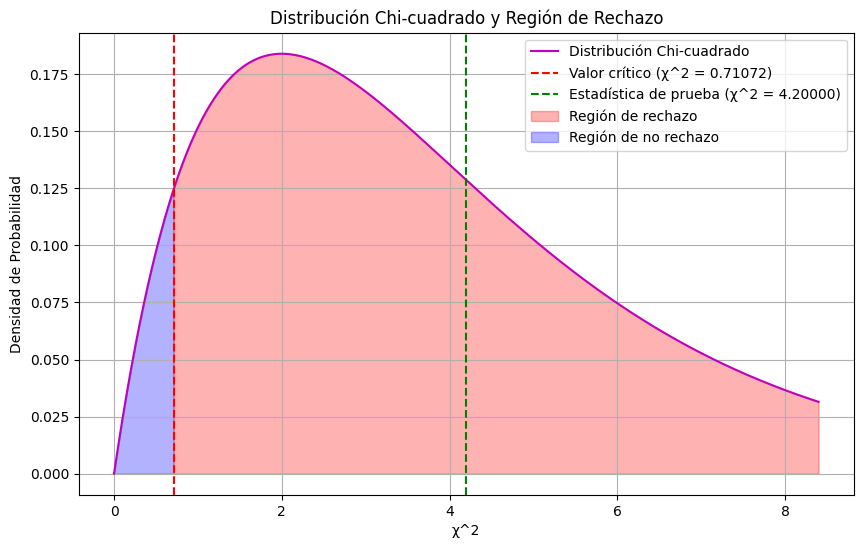

In [12]:
#Comprobamos Hipótesis
print("Entonces nuestra regla de decisión se definirá de la siguiente manera:")
print("\tRechazar H_0 si χ^2 >", valor_critico)
print("\tNo se rechaza H_0 si χ^2 ≤", valor_critico)

if chi_cuadrado <= valor_critico:
    print("\n> Como χ^2 <= Valor crítico, se acepta H_0")
    print("> H_0:", H_0)
else:
    print("\n> Como χ^2 > Valor crítico, no se acepta H_0")
    print("> H_1:", H_1)

#Graficamos la distribución
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'm-', label='Distribución Chi-cuadrado')

# Marcamos el valor crítico y el estadístico de prueba
plt.axvline(valor_critico, color='r', linestyle='--', label=f'Valor crítico (χ^2 = {valor_critico:.5f})')
plt.axvline(chi_cuadrado, color='g', linestyle='--', label=f'Estadística de prueba (χ^2 = {chi_cuadrado:.5f})')

# Rellenamos la región de rechazo (rosa)
plt.fill_between(x, 0, y, where=(x > valor_critico), color='red', alpha=0.3, label='Región de rechazo')

# Rellenamos la región de no rechazo (azul)
plt.fill_between(x, 0, y, where=(x <= valor_critico), color='blue', alpha=0.3, label='Región de no rechazo')

# Etiquetamos y agregamos la leyenda
plt.title('Distribución Chi-cuadrado y Región de Rechazo')
plt.xlabel('χ^2')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

#Mostramos la gráfica
plt.grid(True)
plt.show()